# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science/Human_Resources.csv')

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_df['Age'].describe().transpose()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [ ]:
# 35 features in total, each contains 1470 data points

In [ ]:
i = 0
for col in employee_df.columns:
  if employee_df[col].dtype == 'int64':
    i+=1
print(f'number of int64 columns: {i}')

number of int64 columns: 26


In [ ]:
# target variable later: Attrition
employee_df['Attrition'].value_counts() # imbalanced dataset

0    1233
1     237
Name: Attrition, dtype: int64

# TASK #3: VISUALIZE DATASET

In [ ]:
# Let's replace 'Attrition' , 'OverTime' , 'Over18' column with integers before performing any visualizations 
employee_df[['Attrition', 'OverTime', 'Over18']]

,Attrition,OverTime,Over18
0,Yes,Yes,Y
1,No,No,Y
2,Yes,Yes,Y
3,No,Yes,Y
4,No,No,Y
...,...,...,...
1465,No,No,Y
1466,No,No,Y
1467,No,Yes,Y
1468,No,No,Y


In [ ]:
employee_df['Over18'].value_counts() # only yes...

Y    1470
Name: Over18, dtype: int64

In [ ]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes': 1, 'No': 0})
employee_df['Over18'] = employee_df['Over18'].map({'Y': 1, 'N': 0})

In [ ]:
# Let's see if we have any missing data, luckily we don't!
employee_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

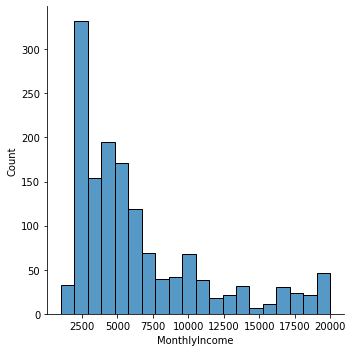

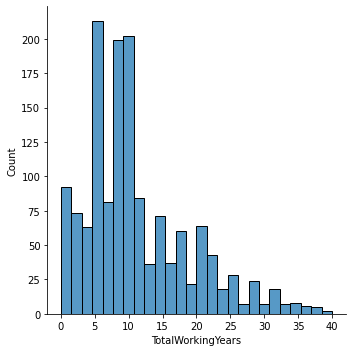

In [ ]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other
sns.displot(x='MonthlyIncome', data=employee_df)
sns.displot(x='TotalWorkingYears', data=employee_df)

In [ ]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df = employee_df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

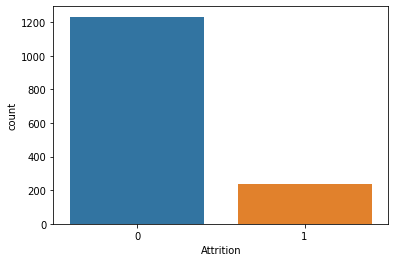

In [ ]:
# Let's see how many employees left the company! 
sns.countplot(x='Attrition', data=employee_df) # 0 are the ones who are staying with us; 1 are the ones who left

In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
employee_df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
left_df = employee_df[employee_df['Attrition'] == 1]

In [ ]:
left_df.describe().transpose()

#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [ ]:
df_numeric = employee_df.select_dtypes(include=np.number)

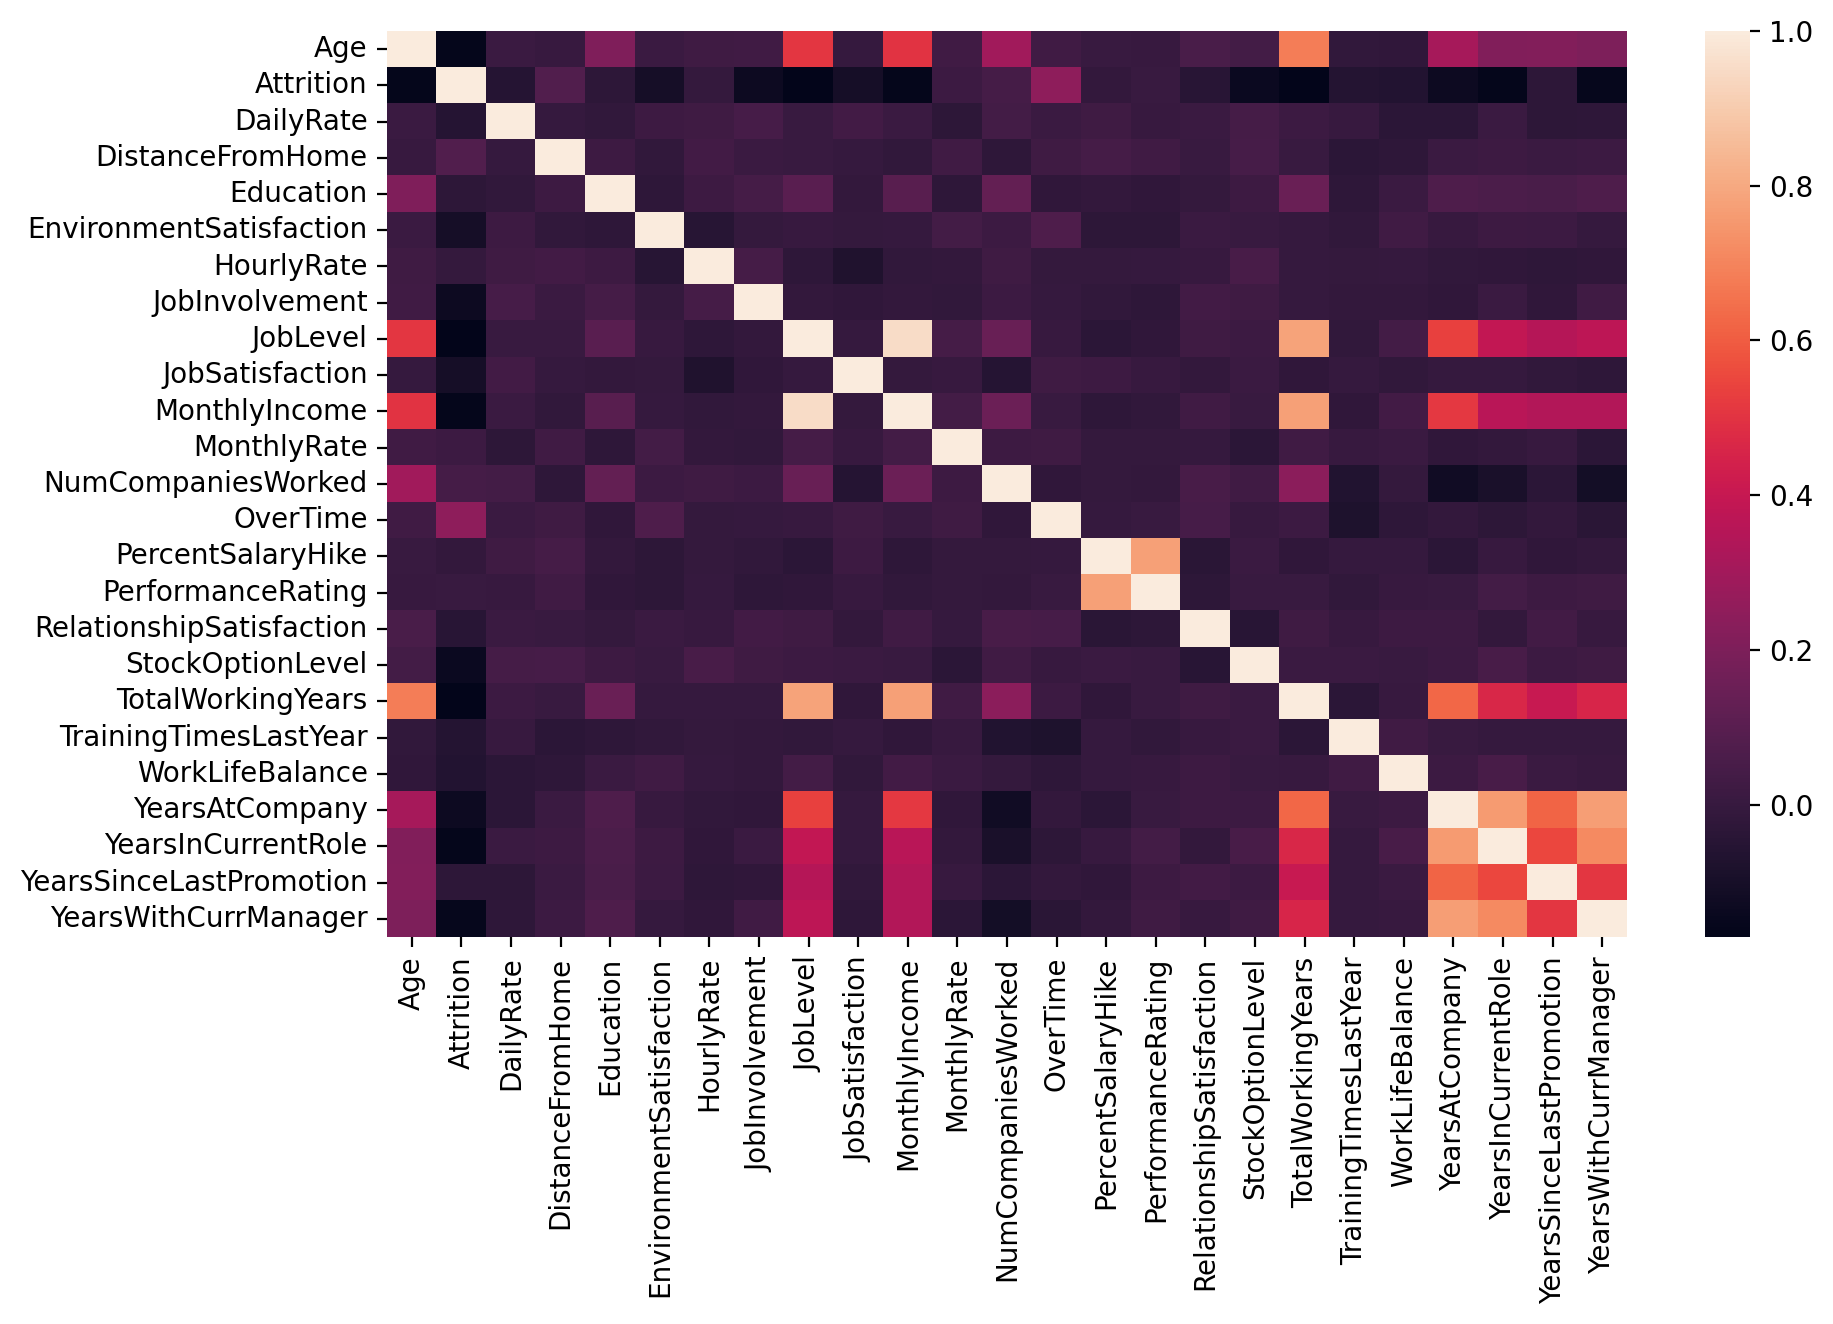

In [ ]:
plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(data=employee_df.corr(), annot=False)

In [ ]:

# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


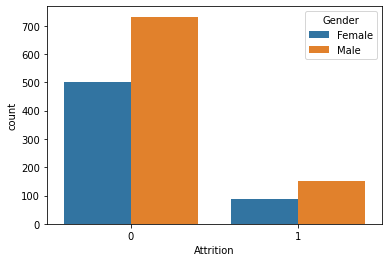

In [ ]:
sns.countplot(x='Attrition', data=employee_df, hue='Gender')

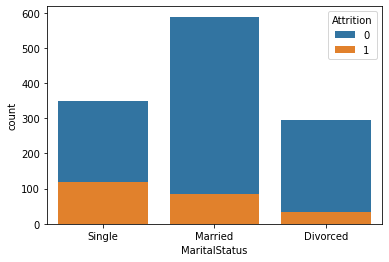

In [ ]:
sns.countplot(x='MaritalStatus', data=employee_df, hue='Attrition', dodge=False)

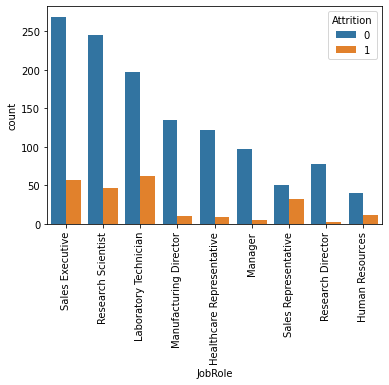

In [ ]:
sns.countplot(x='JobRole', data=employee_df, hue='Attrition')
plt.xticks(rotation=90);

In [ ]:
jobrole = employee_df['JobRole'].value_counts(normalize=True) * 100
jobrole # independent of attrition - the general distribution of job roles

Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: JobRole, dtype: float64

In [ ]:
left_job = employee_df[employee_df['Attrition'] == 1]['JobRole'].value_counts(normalize=True)
left_job # of all who left, what is the distribution of job roles

Laboratory Technician        0.261603
Sales Executive              0.240506
Research Scientist           0.198312
Sales Representative         0.139241
Human Resources              0.050633
Manufacturing Director       0.042194
Healthcare Representative    0.037975
Manager                      0.021097
Research Director            0.008439
Name: JobRole, dtype: float64

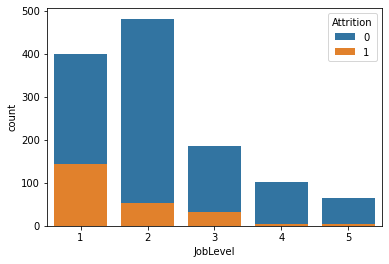

In [ ]:
sns.countplot(x='JobLevel', data=employee_df, hue='Attrition', dodge=False)


In [ ]:


# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

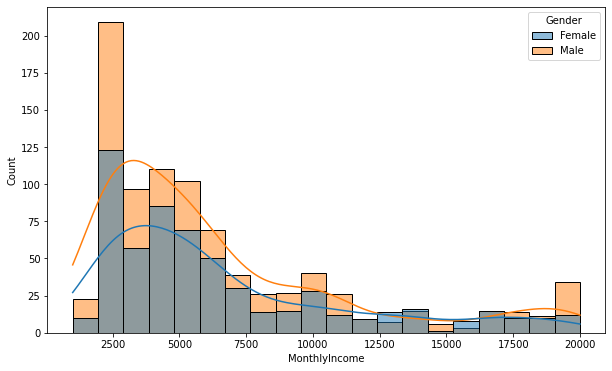

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='MonthlyIncome', data=employee_df, hue='Gender', kde=True)

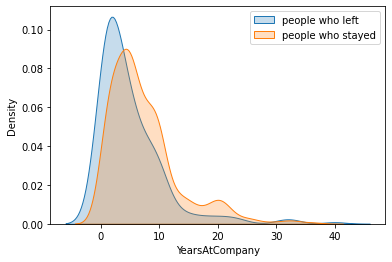

In [ ]:
sns.kdeplot(x='YearsAtCompany', data=employee_df[employee_df['Attrition'] == 1], shade=True, label='people who left')
sns.kdeplot(x='YearsAtCompany', data=employee_df[employee_df['Attrition'] == 0], shade=True, label='people who stayed')
plt.legend()

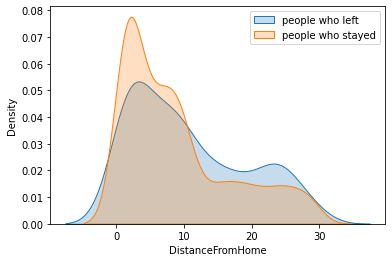

In [ ]:
sns.kdeplot(x='DistanceFromHome', data=employee_df[employee_df['Attrition'] == 1], shade=True, label='people who left')
sns.kdeplot(x='DistanceFromHome', data=employee_df[employee_df['Attrition'] == 0], shade=True, label='people who stayed')
plt.legend()

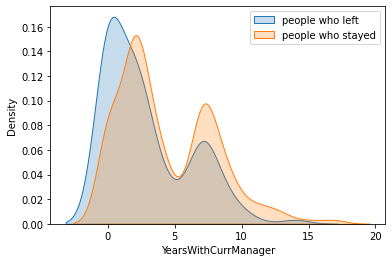

In [ ]:
sns.kdeplot(x='YearsWithCurrManager', data=employee_df[employee_df['Attrition'] == 1], shade=True, label='people who left')
sns.kdeplot(x='YearsWithCurrManager', data=employee_df[employee_df['Attrition'] == 0], shade=True, label='people who stayed')
plt.legend()

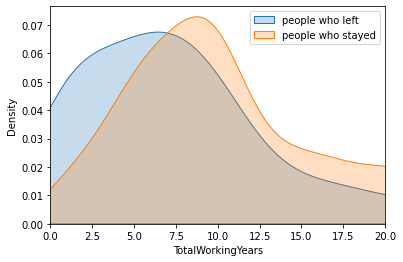

In [ ]:
sns.kdeplot(x='TotalWorkingYears', data=employee_df[employee_df['Attrition'] == 1], shade=True, label='people who left')
sns.kdeplot(x='TotalWorkingYears', data=employee_df[employee_df['Attrition'] == 0], shade=True, label='people who stayed')
plt.xlim(0,20)
plt.legend()

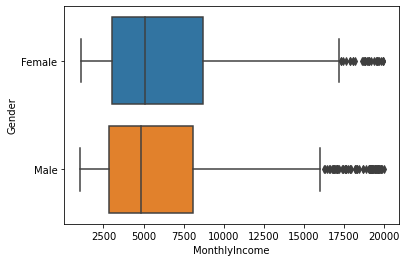

In [ ]:
sns.boxplot(x='MonthlyIncome', data=employee_df, y='Gender')

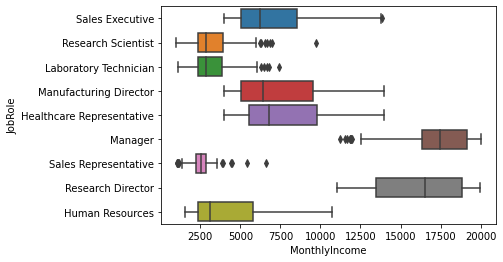

In [ ]:
# Let's see the job role vs. Monthly Income
sns.boxplot(x='MonthlyIncome', data=employee_df, y='JobRole')

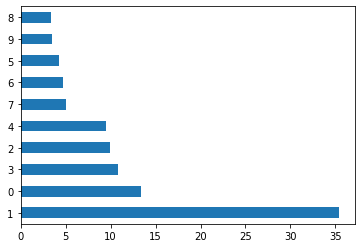

In [ ]:
(employee_df['NumCompaniesWorked'].value_counts(normalize=True) *100).plot(kind = 'barh')

In [ ]:
print(employee_df[employee_df['Attrition'] == 1][['Attrition','JobSatisfaction']].value_counts(normalize=True))
print(employee_df[employee_df['Attrition'] == 0][['Attrition','JobSatisfaction']].value_counts(normalize=True))

Attrition  JobSatisfaction
1          3                  0.308017
           1                  0.278481
           4                  0.219409
           2                  0.194093
dtype: float64
Attrition  JobSatisfaction
0          4                  0.330089
           3                  0.299270
           2                  0.189781
           1                  0.180860
dtype: float64


# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
cols = ['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel']

In [ ]:
X = pd.get_dummies(data=employee_df, drop_first=True, columns=cols).drop('Attrition', axis=1)
y = employee_df['Attrition']

In [ ]:
from sklearn.preprocessing import MinMaxScaler # scaling values between 0 and 1 = Standardization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS 

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
base = LogisticRegression(max_iter=1000)
param_grid = {'C': [1, 0.5, 0.1, 0.01], 'solver': ['lbfgs', 'liblinear', 'sag']} # find optimal parameters for use case

In [ ]:
grid = GridSearchCV(estimator=base, param_grid=param_grid, verbose=1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[CV] END ..................................C=1, solver=lbfgs; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ....................................C=1, solver=sag; total time=   0.1s
[CV] END ....................................C=1

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 0.5, 0.1, 0.01],
                         'solver': ['lbfgs', 'liblinear', 'sag']},
             verbose=2)

In [ ]:
grid.best_score_

0.8783952398124775

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Test data performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       248
           1       0.92      0.48      0.63        46

    accuracy                           0.91       294
   macro avg       0.91      0.74      0.79       294
weighted avg       0.91      0.91      0.90       294



In [ ]:
confusion_matrix(y_test, y_pred) # the model predicts 24 times that people stay but instead they leave -> type 2 error
# the model predicts 2 times that people will leave but instead they will stay -> type 1 error = not so bad in this context
# method returns the values in following sequence: tn, fp, fn, tp

array([[246,   2],
       [ 24,  22]])

# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
base2 = RandomForestClassifier()
param_grid = {'n_estimators': [30, 60, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 6, 8], 'max_features': ['auto', 'log2']}

In [ ]:
grid2 = GridSearchCV(base2, param_grid)

In [ ]:
grid2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [30, 60, 100]})

In [ ]:
grid2.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 30}

In [ ]:
y_pred = grid2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       248
           1       0.62      0.11      0.19        46

    accuracy                           0.85       294
   macro avg       0.74      0.55      0.55       294
weighted avg       0.82      0.85      0.80       294



In [ ]:
confusion_matrix(y_test, y_pred) # again tn, fp, fn, tp
# model has a hard time to predict the people who are leaving; it classifies them as if they are staying instead

array([[245,   3],
       [ 41,   5]])

## Evaluation so far:
Both models are good at predicting persons that are staying or will stay but lack the ability to predict whether a person is likely to leave the company. Reason for this behavior can be that we deal with a inbalanced dataset, where the majority of people are staying. But this must be assumed as given, since when a company has many people who are leaving in the first place, there must be some major issue.

# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(60,)))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               6100      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 26,401
Trainable params: 26,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50, batch_size=50)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.4917 - accuracy: 0.7993
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8376
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8376
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8503
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8835
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8886
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2536 - accuracy: 0.9107
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2300 - accuracy: 0.9184
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9243
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9371
Epoch 11/

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

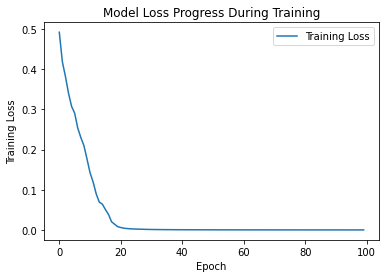

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

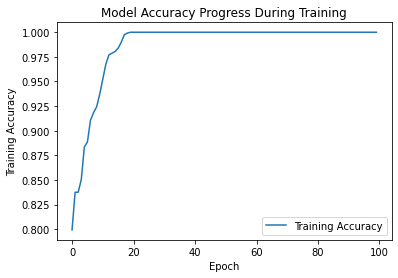

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       248
           1       0.56      0.41      0.47        46

    accuracy                           0.86       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.84      0.86      0.85       294



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[233  15]
 [ 27  19]]


## Conclusion:
All three model archetypes perform similar. There could always be some improvement with parameter finetuning and more testing. For the neural network there can be some sort of mechanic implemented to reduce overfitting to the trainings data. For once, we can reduce the number of epochs, add dropout layers or implement an early stop.

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS